In [0]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

In [3]:
from google.colab import drive
drive.mount('../content/drive')
work_dir = '../content/drive/Shared drives/brown datathon'
print(os.listdir(work_dir))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ../content/drive
['notebook.gdoc', '1', '2', 'Meltpool.png', 'README.docx', 'Finite_Element_Model.png', 'prediction_submission.csv', 'Introduction.ipynb', 'meltpool_1_nn.ipynb', 'temperature_2_nn.ipynb', 'Model_test.ipynb', 'cat_800_0.07_12.sav', 'cat_800_0.07_14.sav', 'temperature_2.ipynb', 'saved_models', 'report.gdoc', 'MergingData_TempPrediction .ipynb']


In [5]:
# Predict 1a
for file in os.listdir(work_dir + "/1/Testing")[:-1]:
    df_temp = pd.read_csv(work_dir + f"/1/Testing/{file}").drop(["Unnamed: 4"], axis=1)
    df_temp["power"] = float(file[-8:-5])
    df_temp["speed"] = float(file[0] + "." + file[2:4])
    y_pred_temp = model_1a.predict(df_temp)
    df_temp["Temp"] = y_pred_temp
    df_temp.drop(["power", "speed"], axis=1, inplace=True)
    df_temp#.to_csv(work_dir + f"\\1\\Testing\\{file}", index=False)

NameError: ignored

In [0]:
laser_speeds = np.linspace(0.6, 1.5, 19)
laser_powers = np.linspace(100, 400, 13)

train_df = pd.DataFrame()
test_df = pd.DataFrame()
for speed in [round(s, 2) for s in laser_speeds]:
    flag=True
    if np.random.rand()>0.8:
        flag=False
    for power in [int(p) for p in laser_powers]:
        flag=True
        if np.random.rand()>0.8:
            flag=False

        file_name = (str(speed).replace('.', '_') 
                    +  'ms_'
                    +  str(power) 
                    +  'W.csv')
        try:
            file_df = pd.read_csv(os.path.join(work_dir, '1/Training', file_name), index_col = False)
            file_df = file_df.assign(speed = lambda x: speed, power = lambda x: power)
            if flag:
                train_df = pd.concat([train_df, file_df])
            else:
                test_df = pd.concat([test_df, file_df])
            print(file_name)
        except:
            pass
            #file_df = pd.read_csv(os.path.join(work_dir, '1/Validation', file_name), index_col = False)
print(train_df.shape)
print(test_df.shape)

0_6ms_100W.csv
0_6ms_125W.csv
0_6ms_150W.csv
0_6ms_175W.csv
0_6ms_200W.csv
0_6ms_225W.csv
0_6ms_250W.csv
0_6ms_275W.csv
0_6ms_300W.csv
0_6ms_325W.csv
0_6ms_350W.csv
0_6ms_375W.csv
0_6ms_400W.csv
0_65ms_100W.csv
0_65ms_125W.csv
0_65ms_150W.csv
0_65ms_175W.csv
0_65ms_200W.csv
0_65ms_225W.csv
0_65ms_275W.csv
0_65ms_300W.csv
0_65ms_325W.csv
0_65ms_350W.csv
0_65ms_375W.csv
0_7ms_100W.csv
0_7ms_125W.csv
0_7ms_150W.csv
0_7ms_175W.csv
0_7ms_200W.csv
0_7ms_225W.csv
0_7ms_250W.csv
0_7ms_275W.csv
0_7ms_300W.csv
0_7ms_350W.csv
0_7ms_375W.csv
0_7ms_400W.csv
0_75ms_100W.csv
0_75ms_125W.csv
0_75ms_150W.csv
0_75ms_175W.csv
0_75ms_200W.csv
0_75ms_225W.csv
0_75ms_250W.csv
0_75ms_300W.csv
0_75ms_325W.csv
0_75ms_375W.csv
0_8ms_100W.csv
0_8ms_125W.csv
0_8ms_150W.csv
0_8ms_175W.csv
0_8ms_250W.csv
0_8ms_275W.csv
0_8ms_300W.csv
0_8ms_325W.csv
0_8ms_350W.csv
0_8ms_375W.csv
0_8ms_400W.csv
0_85ms_100W.csv
0_85ms_300W.csv
0_85ms_350W.csv
0_9ms_100W.csv
0_9ms_125W.csv
0_9ms_150W.csv
0_9ms_175W.csv
0_9ms_200W.csv
0

In [0]:
train_df.to_csv(work_dir+'/1/Training/temp_train.csv')
test_df.to_csv(work_dir+'/1/Training/temp_test.csv')

In [0]:
#full_df_temp.to_csv(work_dir+'/1/Validation/full_temperature_cv.csv')

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
train_X, test_X, train_y, test_y = train_test_split(full_df_temp.drop('Temp',axis=1), full_df_temp['Temp'], test_size=0.33)

In [0]:
reg = LinearRegression()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

0.3903765209003613

In [0]:
train_X1 = train_X.assign(distance = lambda x: np.sqrt(x.X_Coord**2+x.Y_Coord**2+x.Z_Coord**2))
test_X1 = test_X.assign(distance = lambda x: np.sqrt(x.X_Coord**2+x.Y_Coord**2+x.Z_Coord**2))

In [0]:
reg = LinearRegression()
reg.fit(train_X1, train_y)
reg.score(test_X1, test_y)

0.4324717950980601

In [0]:
train_X1 = train_X1.assign(distance_05 = lambda x: x.distance**0.5, distance_2 = lambda x: x.distance**2)
test_X1 = test_X1.assign(distance_05 = lambda x: x.distance**0.5, distance_2 = lambda x: x.distance**2)

In [0]:
reg = LinearRegression()
reg.fit(train_X1, train_y)
reg.score(test_X1, test_y)

0.450078829818562

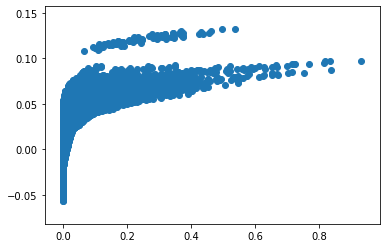

In [0]:
y_pred = reg.predict(test_X1)
import matplotlib.pyplot as plt
plt.scatter(test_y, y_pred)

In [0]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_jobs=-1)
reg.fit(train_X1, train_y)
reg.score(test_X1, test_y)

#y_pred = reg.predict(test_X1)
#plt.scatter(test_y, y_pred)

KeyboardInterrupt: ignored

In [0]:
print(reg.score(test_X1, test_y))

0.9953257457881194
